# Investigation of time offset CRACO-246

In [1]:
%matplotlib inline
from craco.plot_cand import load_cands
from pylab import *
import numpy as np
import pandas as pd


In [2]:
cd /CRACO/DATA_16/craco/SB062403/scans/00/20240515181824

/CRACO/DATA_16/craco/SB062403/scans/00/20240515181824


/CRACO/SOFTWARE/ban115/venv310/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [181]:
def my_load_cands(fname):
    c = load_cands(fname)
    c = c[(c['snr'] > 5) & (c['dm_pccm3'] > 180-50) & (c['dm_pccm3'] < 180+50)]
    return c

In [182]:
online = my_load_cands('candidates.b33.txt')
offline = my_load_cands('offline/candidates.b33.txt')

In [183]:
offline.dtype

dtype([('snr', '<f4'), ('lpix', 'u1'), ('mpix', 'u1'), ('boxc_width', 'u1'), ('time', 'u1'), ('dm', '<u2'), ('iblk', '<u4'), ('rawsn', '<i2'), ('total_sample', '<u4'), ('obstime_sec', '<f4'), ('mjd', '<f8'), ('dm_pccm3', '<f4'), ('ra_deg', '<f4'), ('dec_deg', '<f4')])

In [184]:
tab = pd.read_csv('tab/J1809-1943.cand', delimiter='\s+', comment='#', header=0)
tab = tab[(180-50 < tab['DM_pccc']) & ( tab['DM_pccc'] < 180+50) & (tab['SNR'] > 10)]
tab.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83 entries, 3 to 123
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SNR             83 non-null     float64
 1   boxcar          83 non-null     float64
 2   DM              83 non-null     float64
 3   samp            83 non-null     float64
 4   ngroup          83 non-null     float64
 5   ncluster        83 non-null     float64
 6   boxcar_ms       83 non-null     float64
 7   DM_pccc         83 non-null     float64
 8   time_s          83 non-null     float64
 9   mjd_inf         83 non-null     float64
 10  mjd_lower_edge  83 non-null     float64
dtypes: float64(11)
memory usage: 7.8 KB


(460.0, 470.0)

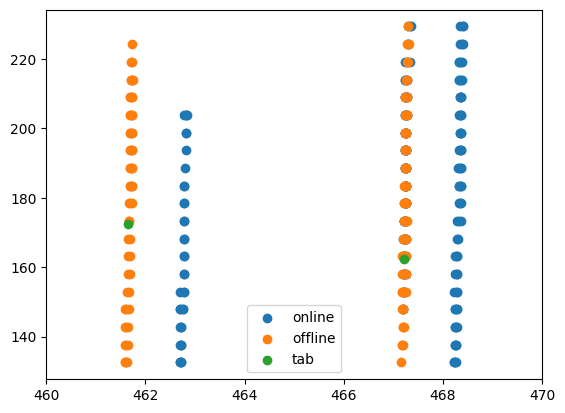

In [185]:
scatter(online['obstime_sec'],online['dm_pccm3'], label='online')
scatter(offline['obstime_sec'],offline['dm_pccm3'], label='offline')
scatter(tab['time_s'],tab['DM_pccc'], label='tab')
legend()
xlim(460,470)

(460.0, 480.0)

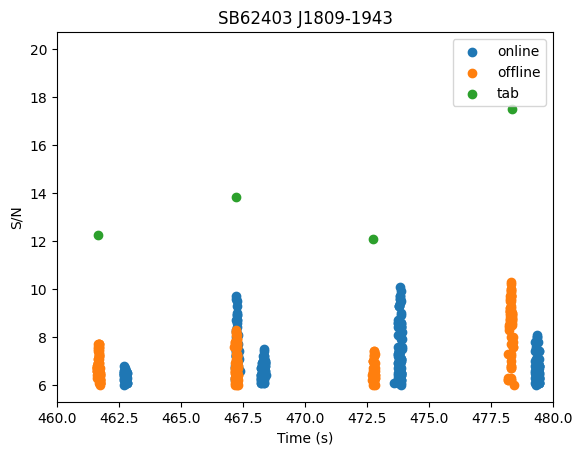

In [200]:
scatter(online['obstime_sec'],online['snr'], label='online')
scatter(offline['obstime_sec'],offline['snr'], label='offline')
scatter(tab['time_s'],tab['SNR'], label='tab')
legend()
xlabel('Time (s)')
ylabel('S/N')
title('SB62403 J1809-1943')
t = 32*256*0.0138
dt = 4*256*0.0138
xlim(460,480)

In [187]:
maxiblk = online['iblk'].max()
maxiblk

168

In [188]:
for iblk in range(maxiblk):
    print(iblk, sum(offline['iblk'] == iblk), sum(online['iblk'] == iblk))

0 0 0
1 0 0
2 0 0
3 3 0
4 0 0
5 46 0
6 0 0
7 2 0
8 5 0
9 0 0
10 0 40
11 2 0
12 0 0
13 0 18
14 0 0
15 0 0
16 0 1
17 1 0
18 0 0
19 0 0
20 15 0
21 0 0
22 1 0
23 0 0
24 0 0
25 7 21
26 1 0
27 106 7
28 0 1
29 0 0
30 1 1
31 2 0
32 0 29
33 0 0
34 29 0
35 0 1
36 0 0
37 0 0
38 68 11
39 29 4
40 0 0
41 59 4
42 3 0
43 0 0
44 45 51
45 41 0
46 0 52
47 13 0
48 0 0
49 0 33
50 3 41
51 0 0
52 0 0
53 6 0
54 0 0
55 1 13
56 72 0
57 1 0
58 80 0
59 37 0
60 14 0
61 10 37
62 1 0
63 62 13
64 54 42
65 1 12
66 31 0
67 19 2
68 0 41
69 2 27
70 15 0
71 0 0
72 52 24
73 0 0
74 7 6
75 71 0
76 0 0
77 37 3
78 4 0
79 0 0
80 16 63
81 0 0
82 2 53
83 91 21
84 0 0
85 50 127
86 0 1
87 0 0
88 2 66
89 11 0
90 0 0
91 51 0
92 35 0
93 0 0
94 16 26
95 0 0
96 7 41
97 0 50
98 0 0
99 1 51
100 26 1
101 0 0
102 1 24
103 19 0
104 4 0
105 14 29
106 25 0
107 0 45
108 62 12
109 0 1
110 37 1
111 70 28
112 0 0
113 37 67
114 75 0
115 1 0
116 107 80
117 92 0
118 1 35
119 128 75
120 1 0
121 67 153
122 97 88
123 0 0
124 28 81
125 60 0
126 1 1
127 7

In [189]:
offline['lpix']

array([54, 54, 91, ..., 55,  6, 54], dtype=uint8)

In [190]:
offline['mpix']

array([ 44,  44, 228, ...,  43, 175,  43], dtype=uint8)

# One of those online times was right. WTF?

In [191]:
onok = online[(online['obstime_sec'] > 467) & (online['obstime_sec'] < 468)]

In [192]:
onok['iblk']

array([132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132,
       132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132,
       132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132,
       132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132,
       132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132,
       132, 132, 132, 132, 132, 132, 132, 132, 132, 132], dtype=uint32)

In [193]:
onok['time']

array([ 4,  4,  5,  5,  5,  5,  5,  5,  8,  5,  5,  4,  8,  6,  5,  4,  8,
        8,  5,  5,  5,  8,  8,  7,  6,  5,  8,  8,  8,  7,  7,  6,  8,  8,
        8,  7,  7,  7,  8,  8,  8,  7,  7,  7,  8,  8,  8,  6,  7,  7,  8,
        8,  8,  7,  7,  8,  9,  9,  7,  7,  8, 10,  9,  7,  7, 10, 10,  7,
        9, 14, 11, 11, 11, 14, 16], dtype=uint8)

In [194]:
blks = np.unique(online['iblk']) 
blks

array([ 10,  13,  16,  25,  27,  28,  30,  32,  35,  38,  39,  41,  44,
        46,  49,  50,  55,  61,  63,  64,  65,  67,  68,  69,  72,  74,
        77,  80,  82,  83,  85,  86,  88,  94,  96,  97,  99, 100, 102,
       105, 107, 108, 109, 110, 111, 113, 116, 118, 119, 121, 122, 124,
       126, 127, 129, 130, 132, 133, 135, 136, 137, 138, 140, 141, 143,
       144, 146, 147, 148, 149, 151, 152, 154, 155, 157, 158, 160, 165,
       166, 168], dtype=uint32)

In [195]:
blks % 11

array([10,  2,  5,  3,  5,  6,  8, 10,  2,  5,  6,  8,  0,  2,  5,  6,  0,
        6,  8,  9, 10,  1,  2,  3,  6,  8,  0,  3,  5,  6,  8,  9,  0,  6,
        8,  9,  0,  1,  3,  6,  8,  9, 10,  0,  1,  3,  6,  8,  9,  0,  1,
        3,  5,  6,  8,  9,  0,  1,  3,  4,  5,  6,  8,  9,  0,  1,  3,  4,
        5,  6,  8,  9,  0,  1,  3,  4,  6,  0,  1,  3], dtype=uint32)

In [196]:
blks % 5

array([0, 3, 1, 0, 2, 3, 0, 2, 0, 3, 4, 1, 4, 1, 4, 0, 0, 1, 3, 4, 0, 2,
       3, 4, 2, 4, 2, 0, 2, 3, 0, 1, 3, 4, 1, 2, 4, 0, 2, 0, 2, 3, 4, 0,
       1, 3, 1, 3, 4, 1, 2, 4, 1, 2, 4, 0, 2, 3, 0, 1, 2, 3, 0, 1, 3, 4,
       1, 2, 3, 4, 1, 2, 4, 0, 2, 3, 0, 0, 1, 3], dtype=uint32)

In [213]:
for x in (zip(blks, blks % 11, blks % 5)):
    iblk = x[0]
    cands = online[online['iblk'] == iblk]
    print(x, len(cands), np.median(cands['time']), np.median(cands['obstime_sec']), np.median(cands['total_sample']))

(10, 10, 0) 40 46.0 36.0253 2606.0
(13, 2, 3) 18 84.5 47.1744 3412.5
(16, 5, 1) 1 140.0 58.5585 4236.0
(25, 3, 0) 21 212.0 91.4043 6612.0
(27, 5, 2) 7 103.0 96.9754 7015.0
(28, 6, 3) 1 98.0 100.4452 7266.0
(30, 8, 0) 1 14.0 106.3619 7694.0
(32, 10, 2) 29 24.0 113.578 8216.0
(35, 2, 0) 1 61.0 124.7063 9021.0
(38, 5, 3) 11 14.0 134.6734 9742.0
(39, 6, 4) 4 235.0 141.2675 10219.0
(41, 8, 1) 4 120.0 146.7556 10616.0
(44, 0, 4) 51 159.0 157.9115 11423.0
(46, 2, 1) 52 48.0 163.455 11824.0
(49, 5, 4) 33 78.0 174.4865 12622.0
(50, 6, 0) 41 226.0 180.0714 13026.0
(55, 0, 0) 13 149.0 196.7017 14229.0
(61, 6, 1) 37 217.0 218.8754 15833.0
(63, 8, 3) 13 106.0 224.4188 16234.0
(64, 9, 4) 42 252.0 229.9761 16636.0
(65, 10, 0) 12 0.0 230.0314 16640.0
(67, 1, 2) 2 149.0 239.16904 17301.0
(68, 2, 3) 41 30.0 241.0629 17438.0
(69, 3, 4) 27 175.0 246.6063 17839.0
(72, 6, 2) 24 205.0 257.6379 18637.0
(74, 8, 4) 6 97.0 263.2228 19041.0
(77, 0, 2) 3 124.0 274.2129 19836.0
(80, 3, 0) 63 165.0 285.3965 20645.0


In [198]:
assert np.all(offline['total_sample'] == offline['iblk']*256 + offline['time'])

In [206]:
f1=0.791
f2=f1 + 240*0.001
dm = 182
dt = 4.15*dm*(f1**-2 - f2**-2)
dt

496.602385573941

In [210]:
dt/13.8

35.98568011405369

In [2]:
import numpy as np

In [29]:
d = np.zeros((435,288,32,2))

In [30]:
import tempfile

In [31]:
f = open('test.bin', 'wb')

In [32]:
%timeit d.tofile(f)

31.1 ms ± 338 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [33]:
%timeit f.write(d.tobytes())

81.1 ms ± 20.5 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [34]:
%timeit f.write(d.data)

45 ms ± 7.38 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [37]:
d.data?

Type:        memoryview
String form: <memory at 0x7f81d1c93d40>
Length:      435
Docstring:   Create a new memoryview object which references the given object.

In [35]:
f.close()

In [36]:
import os
os.remove('test.bin')